In [36]:
import os
import shutil
import numpy as np # linear algebra
import tensorflow as tf
from keras.utils import image_dataset_from_directory, load_img
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [37]:
data = image_dataset_from_directory(
    'flowers',
    image_size=(128, 128),
    batch_size=32  # Adjust the batch size as needed
)

Found 1785 files belonging to 2 classes.


In [38]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [39]:
# Prepare data arrays
images, labels = [], []
for image, label in data:
    images.append(image.numpy())
    labels.append(label.numpy())
images, labels = np.concatenate(images), np.concatenate(labels)
images /= 255.0  # Normalize pixel values

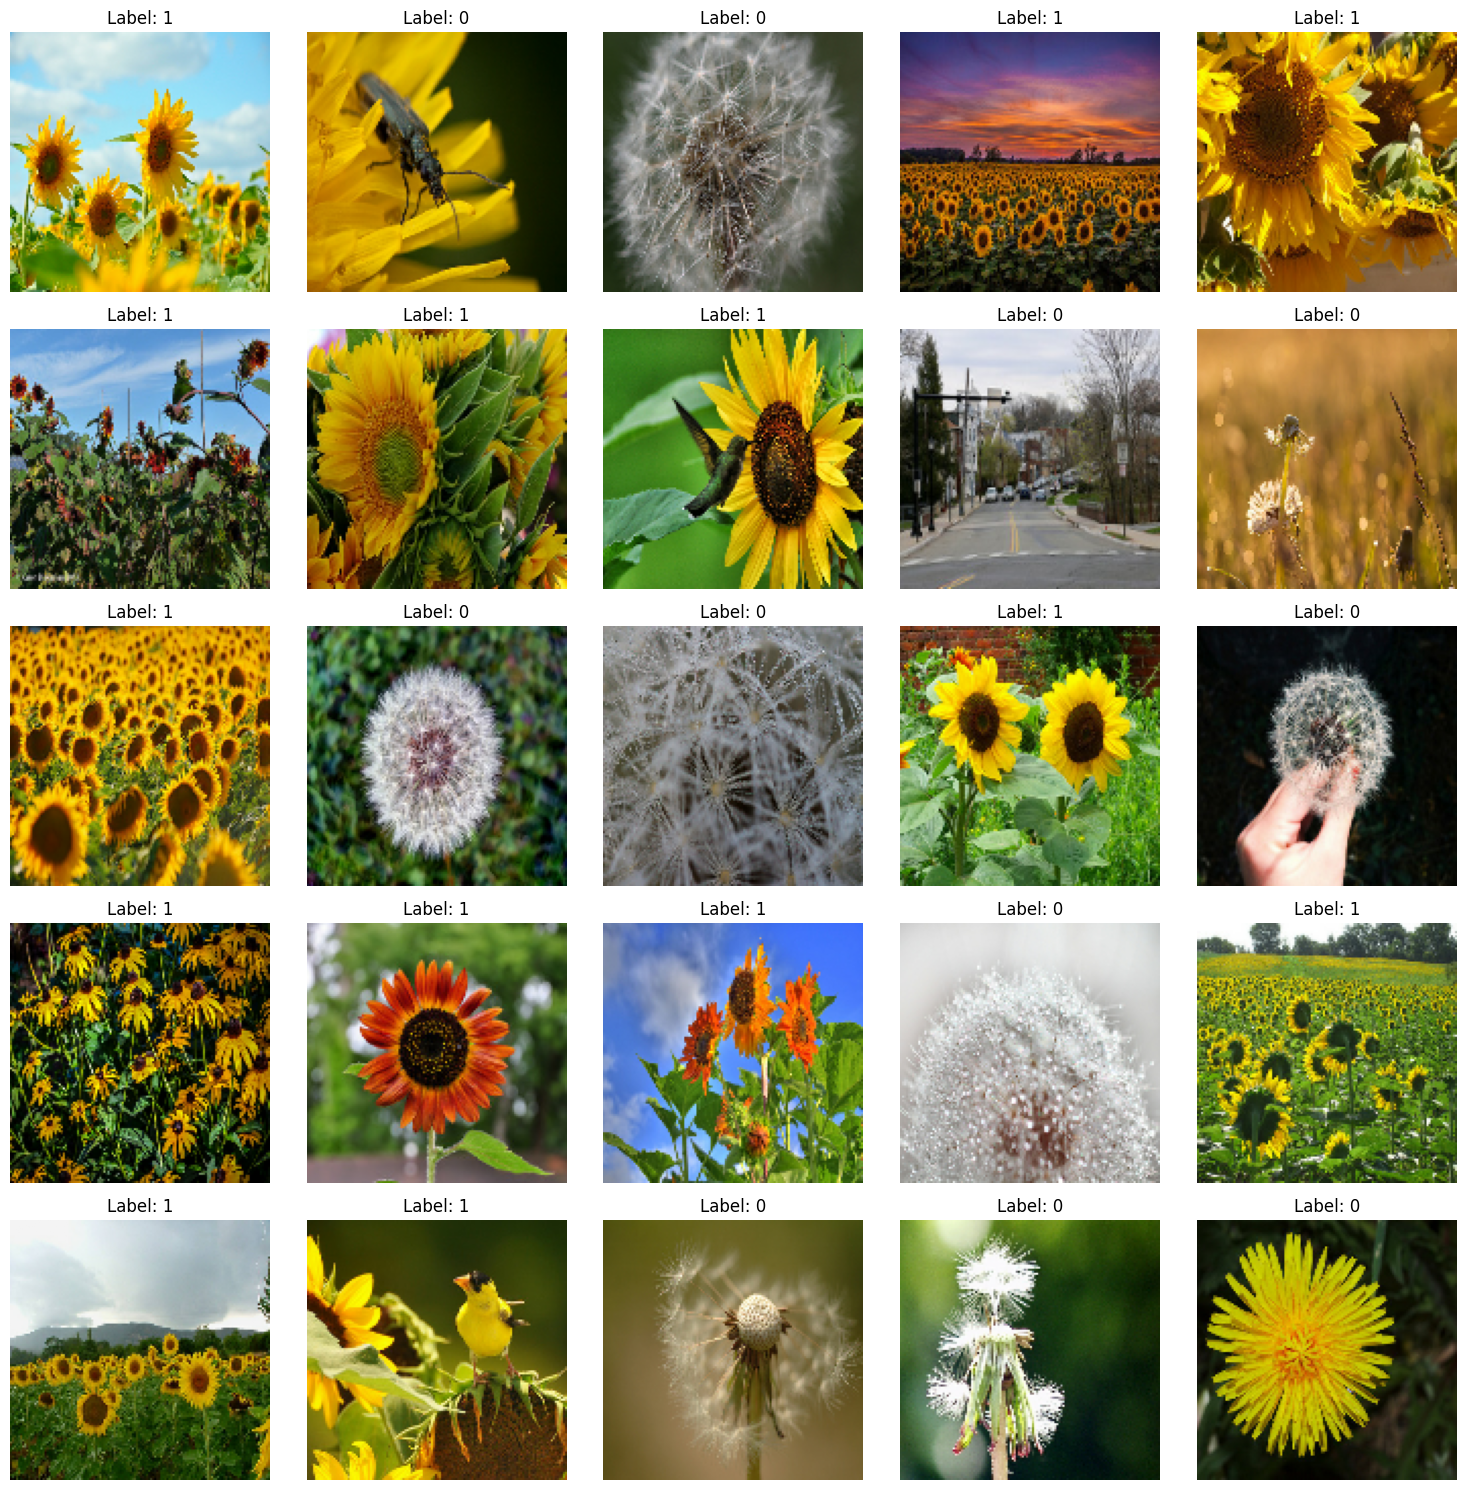

In [40]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten()

for i in range(25):
    axes[i].imshow(images[i])
    axes[i].axis('off')  # Hide axis
    axes[i].set_title(f"Label: {labels[i]}")

plt.tight_layout()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, shuffle=True, random_state=11, stratify=labels)


In [44]:
import tensorflow as tf
from tensorflow.keras.layers import  Input, Activation, Flatten, Conv2D, MaxPooling2D,  Dense
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
 


In [45]:
inputs = Input(shape=(128, 128, 3), name="Input")  # Adjusted input shape to (128, 128, 3)
x = Conv2D(32, 3, activation="relu", padding='same', name='Conv1')(inputs)
x = MaxPooling2D(2, name='Pool1')(x)
x = Conv2D(16, 3, activation="relu", padding='same', name='Conv2')(x)
x = MaxPooling2D(2, name='Pool2')(x)
x = Flatten(name='Vectorize')(x)
x = Dense(3, name='FC')(x)
outputs = Activation("softmax", name='Softmax')(x)
model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['acc'])
model.summary()

hist = model.fit(
    X_train,
    to_categorical(y_train, 3),  # One-hot encode your labels
    batch_size=32,
    epochs=10,
    validation_split=0.15,
    shuffle='on'
)


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Vectorize (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC (Dense)                      │ (None, 3)              │        49,155 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Activation)            │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,675 (213.57 KB)

 Trainable params: 54,675 (213.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - acc: 0.5963 - loss: 0.6733 - val_acc: 0.7612 - val_loss: 0.4350
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - acc: 0.8241 - loss: 0.4063 - val_acc: 0.8010 - val_loss: 0.4674
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - acc: 0.8439 - loss: 0.3490 - val_acc: 0.8109 - val_loss: 0.3909
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - acc: 0.8228 - loss: 0.3590 - val_acc: 0.8209 - val_loss: 0.3827
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - acc: 0.8672 - loss: 0.2998 - val_acc: 0.8159 - val_loss: 0.4348
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - acc: 0.8885 - loss: 0.2552 - val_acc: 0.8458 - val_loss: 0.3768
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - acc: 0.9203 - loss: 0.2073 - val_acc: 0.8557 - val_loss: 0.3942
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - acc: 0.9442 - loss: 0.1696 - val_acc: 0.8308 - val_loss: 0.4020
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - acc: 0.9416

In [46]:
y_hat=model.predict(X_test) #test the model, prob.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [47]:
print('Acc=',np.sum(y_hat.argmax(1)==y_test)/y_test.shape[0])

Acc= 0.7986577181208053


  0%|          | 0/4998 [00:00<?, ?it/s]

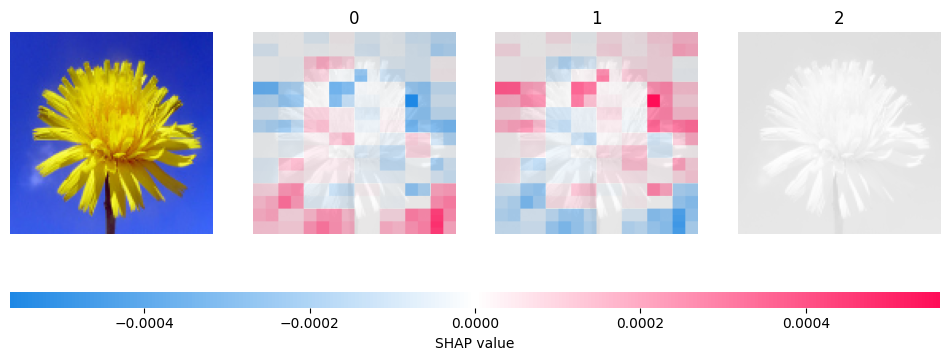

In [57]:
import shap
def f(x):
    tmp = x.copy()
    return model(tmp)
masker_blur = shap.maskers.Image("blur(128,128)", X_test[0].shape)
explainer = shap.Explainer(f, masker_blur, output_names=list(range(3)))
ind=[311]
shap_values_ = explainer( X_test[ind], max_evals=5000, batch_size=50 )     
shap.image_plot(shap_values_,labels=[0,1,2])